<a href="https://colab.research.google.com/github/hmcoo/Colab/blob/master/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt


In [91]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
#     input_shape1 = (2, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#     input_shape1 = (img_rows, img_cols, 2)

    x_train = x_train.astype('float32')
    
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train0 = keras.utils.to_categorical(y_train, num_classes)
y_test0 = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(6, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))


In [0]:
# # convert class vectors to binary class matrices
y_train1 = keras.utils.to_categorical(y_train, num_classes)
y_test1 = keras.utils.to_categorical(y_test, num_classes)

model1 = Sequential()
model1.add(Conv2D(6, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(16, (5, 5), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(120, activation='relu'))
model1.add(Dense(84, activation='relu'))

model1.add(Dense(num_classes, activation='softmax'))


In [0]:
y_train2 = keras.utils.to_categorical(y_train, num_classes)
y_test2 = keras.utils.to_categorical(y_test, num_classes)

model2 = Sequential()
model2.add(Conv2D(24, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(36, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(120, activation='relu'))
model2.add(Dense(84, activation='relu'))

model2.add(Dense(num_classes, activation='softmax'))


In [79]:
model.summary()
model1.summary()
model2.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_67 (Dense)             (None, 84)              

In [92]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

result2 = model2.fit(x_train, y_train2,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test2))
score2 = model2.evaluate(x_test, y_test2, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 37s 624us/step - loss: 0.3278 - acc: 0.9011 - val_loss: 0.0974 - val_acc: 0.9666
Epoch 2/12
60000/60000 [==============================] - 35s 589us/step - loss: 0.0752 - acc: 0.9769 - val_loss: 0.0518 - val_acc: 0.9829
Epoch 3/12
60000/60000 [==============================] - 35s 585us/step - loss: 0.0506 - acc: 0.9844 - val_loss: 0.0337 - val_acc: 0.9895
Epoch 4/12
60000/60000 [==============================] - 35s 587us/step - loss: 0.0394 - acc: 0.9878 - val_loss: 0.0310 - val_acc: 0.9896
Epoch 5/12
60000/60000 [==============================] - 35s 590us/step - loss: 0.0318 - acc: 0.9898 - val_loss: 0.0308 - val_acc: 0.9893
Epoch 6/12
60000/60000 [==============================] - 36s 592us/step - loss: 0.0263 - acc: 0.9912 - val_loss: 0.0319 - val_acc: 0.9886
Epoch 7/12
60000/60000 [==============================] - 36s 594us/step - loss: 0.0227 - acc: 0.9932 - val_loss: 0.

In [93]:
# https://keras.io/optimizers/ 


model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

result1 = model1.fit(x_train, y_train1,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test1))
score1 = model1.evaluate(x_test, y_test1, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
 5120/60000 [=>............................] - ETA: 40s - loss: 1.5106 - acc: 0.5051

KeyboardInterrupt: ignored

In [90]:
# https://keras.io/optimizers/ 

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

result = model.fit(x_train, y_train0,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test0))
score = model.evaluate(x_test, y_test0, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
 1920/60000 [..............................] - ETA: 1:10 - loss: 2.0460 - acc: 0.3604

KeyboardInterrupt: ignored

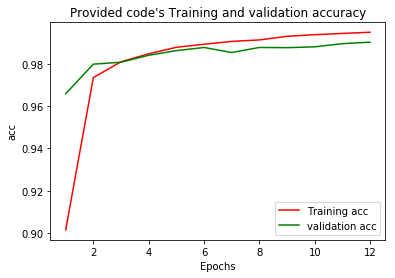

In [26]:
acc = result0.history['acc']
val_acc = result0.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='validation acc')

plt.title('Provided code\'s Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()


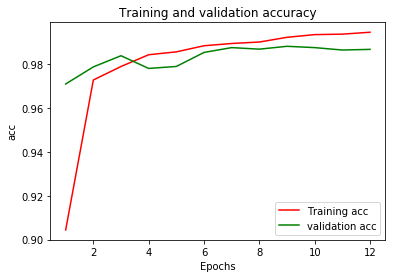

In [69]:
acc = result1.history['acc']
val_acc = result1.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()


In [0]:
acc = result2.history['acc']
val_acc = result2.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()
